# Problem 1: K means clustering


#### Perform k means clustering on the [r,g,b] pixel data of the image 'chilis.jpg' for k = 3 clusters. Terminate the algorithm when the cluster means do not change in an iteration. 

You can initialize the cluster centers as:
*   $c_1=[255, 0, 0]$
*   $c_2=[0,0,0]$
*   $c_3=[255,255,255]$

In order to visualise the output, replace all pixels corresponding to a cluster with it's mean value. Display this image along with the cluster means.

Code the algorithm from scratch without using libraries like scikit-learn.  




# Extract the pixels from the image

In [1]:
from PIL import Image

im = Image.open('chilis.jpg') # open the jpg file
pix = im.load()
print(im.size)  # Get the width and hight of the image for iterating over
print(pix)
pixel_values = list(im.getdata()) #store the pixel data as a list

(220, 202)


In [2]:
import numpy as np
import math

#-------------------------------------------------------
#                cluster initialization
#-------------------------------------------------------
c_1=[255,0,0]
c_2=[0,0,0]
c_3=[255,255,255]
#-------------------------------------------------------
data_set = np.array(pixel_values) #convert the data to numpy array
#-------------------------------------------------------
#compute the euclidean distance of every data point wrt initialized cluster
print(len(data_set))
new_c1 = c_1
new_c2 = c_2
new_c3 = c_3
for j in range(0,8): 
    sum_r_c1 = 0
    sum_r_c2 = 0
    sum_r_c3 = 0
    sum_g_c1 = 0
    sum_g_c2 = 0
    sum_g_c3 = 0
    sum_b_c1 = 0
    sum_b_c2 = 0
    sum_b_c3 = 0
    count_1 = 0
    count_2 = 0
    count_3 = 0
    dist_c1 = []
    dist_c2 = []
    dist_c3 = []
    label = []
    for i in range(0,len(data_set)):
        dist_c1_temp = np.linalg.norm(new_c1 - data_set[i])
        dist_c2_temp = np.linalg.norm(new_c2 - data_set[i])
        dist_c3_temp = np.linalg.norm(new_c3 - data_set[i])
        if dist_c1_temp <= dist_c2_temp and dist_c1_temp <= dist_c3_temp:
            label.append(1)
            count_1 = count_1 + 1
            sum_r_c1 = sum_r_c1 + data_set[i][0]
            sum_g_c1 = sum_g_c1 + data_set[i][1]
            sum_b_c1 = sum_b_c1 + data_set[i][2]
        if dist_c2_temp < dist_c1_temp and dist_c2_temp <= dist_c3_temp:
            label.append(2)
            count_2 = count_2 + 1
            sum_r_c2 = sum_r_c2 + data_set[i][0]
            sum_g_c2 = sum_g_c2 + data_set[i][1]
            sum_b_c2 = sum_b_c2 + data_set[i][2]
        if dist_c3_temp < dist_c1_temp and dist_c3_temp < dist_c2_temp:
            label.append(3)
            sum_r_c3 = sum_r_c3 + data_set[i][0]
            sum_g_c3 = sum_g_c3 + data_set[i][1]
            sum_b_c3 = sum_b_c3 + data_set[i][2]
            count_3 = count_3 + 1

    new_c1 = np.array([round(sum_r_c1/count_1),round(sum_g_c1/count_1),round(sum_b_c1/count_1)])
    new_c2 = np.array([round(sum_r_c2/count_2),round(sum_g_c2/count_2),round(sum_b_c2/count_2)])
    new_c3 = np.array([round(sum_r_c3/count_3),round(sum_g_c3/count_3),round(sum_b_c3/count_3)])

    print("Epoch ",j+1," medians: ",new_c1,new_c2,new_c3)
print(len(label))
print(len(data_set))
final_data_set = []    
for i in range(0,len(data_set)):
    if label[i] == 1:
        final_data_set.append(new_c1)
    elif label[i] == 2:
        final_data_set.append(new_c2)
    elif label[i] == 3:
        final_data_set.append(new_c3)

arr1 = np.array(final_data_set,dtype=np.uint8)





44440
Epoch  1  medians:  [145  36  70] [ 44 117  61] [156 205 216]
Epoch  2  medians:  [129  28  60] [ 37 128  63] [158 205 218]
Epoch  3  medians:  [128  28  59] [ 38 128  63] [158 205 219]
Epoch  4  medians:  [128  27  59] [ 38 128  63] [158 205 219]
Epoch  5  medians:  [128  27  59] [ 38 128  63] [158 205 219]
Epoch  6  medians:  [128  27  59] [ 38 128  63] [158 205 219]
Epoch  7  medians:  [128  27  59] [ 38 128  63] [158 205 219]
Epoch  8  medians:  [128  27  59] [ 38 128  63] [158 205 219]
44440
44440


In [3]:
counter = 0

array2 = np.zeros([202,220, 3], dtype=np.uint8)
for i in range(0,202):
    for j in range(0,220):
        array2[i,j,0] = arr1[counter][0]
        array2[i,j,1] = arr1[counter][1]
        array2[i,j,2] = arr1[counter][2]
        counter = counter + 1
new_image = Image.fromarray(array2)
new_image.save('new.png')

#Problem 2: S.V.M

The Support Vector Machine(S.V.M) algorithm is to find the hyperplane in the N-dimensional space (N-Number of features) that distinctly classifies the data points.

To separate the two classes of data points, there are many possible hyperplanes that could be chosen. The objective is to find a plane that has the maximum margin, i.e the maximum distance between data points of both classes. Maximizing the margin distance provides some reinforcement so that future data points can be classified with more confidence.

##Problem 2, Part A: Linear S.V.M


Use dataset A (``data_prob2_parta.csv``)  for this part of the question. The given CSV file has three columns: column 1 is the first input feature, column 2 is the second input feature and column 3 is the output label. Split the dataset into the training data (75%) and testing data(25%) randomly.




In [36]:
import numpy as np
import pandas as pd
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn import svm
from sklearn.model_selection import train_test_split


In [49]:
df = pd.read_csv('data_prob2_parta.csv')
print(df.head())
y = df["Output"]
X = df.drop("Output",axis=1)
print(X)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25)

   Input Feature  Input Feature.1  Output
0      39.146901        81.434567     0.0
1      18.251029        15.692596     1.0
2      10.292564        19.760821     1.0
3      16.880855        27.446969     1.0
4      42.867947        83.981230     0.0
      Input Feature  Input Feature.1
0         39.146901        81.434567
1         18.251029        15.692596
2         10.292564        19.760821
3         16.880855        27.446969
4         42.867947        83.981230
...             ...              ...
2095      36.830123        64.863953
2096      35.930707        76.592258
2097      21.806859        24.421647
2098      12.089820        10.534441
2099      41.833507        85.063913

[2100 rows x 2 columns]


Visualize the training data with a scatter plot (input feature 1 on the X axis, input feature 2 on the Y axis and color the points according to their labels)

Text(0, 0.5, 'Feature 2')

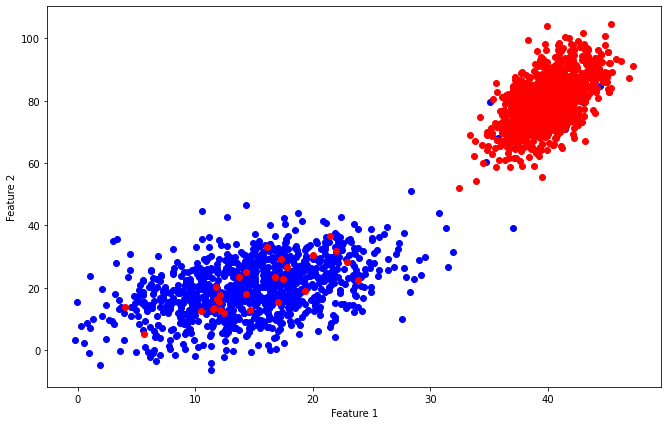

In [50]:
import matplotlib.pyplot as plt
X1 = df[df["Output"] > 0]
X2 = df[df["Output"] == 0]
plt.figure(figsize=(11,7))
plt.scatter(X1["Input Feature"],X1["Input Feature.1"],color = 'blue')
plt.scatter(X2["Input Feature"],X2["Input Feature.1"],color = 'red')
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

Build the Support Vector Machine  model using the 
training data. The scikit
library can be used to build the model.

In [51]:
clf = svm.SVC(kernel='linear', C=1000)
clf.fit(X_train, y_train)
print(clf.n_support_)

[45 45]


Print the parameter and support vectors.


In [52]:
print(clf.get_params())
#print(clf.intercept_)
#print(clf.coef_)
#print(clf.dual_coef_)
#print(clf.classes_)
#print(clf.class_weight_)

{'C': 1000, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'scale', 'kernel': 'linear', 'max_iter': -1, 'probability': False, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}


Print the final accuracy on the test data.


In [11]:
print(clf.support_vectors_)
print(clf.score(X_test,y_test,sample_weight=None))

[[34.81768234 69.16210092]
 [11.57980684 13.45010625]
 [38.01930805 82.11676867]
 [17.42892087 22.93380586]
 [33.89634214 54.36818075]
 [23.88462205 22.54265578]
 [44.11885505 82.86027411]
 [12.47373207 11.92473513]
 [ 5.60837683  5.3320432 ]
 [37.67416986 60.68526056]
 [38.55037593 82.18040735]
 [19.32011275 18.86456591]
 [17.80095926 26.8048466 ]
 [37.61692531 72.10485518]
 [39.51008363 55.68330331]
 [46.91964978 87.14694295]
 [14.35036782 24.91863591]
 [41.37946285 72.37847252]
 [20.0128898  30.45106803]
 [11.48920131 13.05380759]
 [38.75480726 66.92335209]
 [17.31131006 29.10314102]
 [38.61488649 71.73909818]
 [39.90971538 71.67020715]
 [39.43563552 83.18535557]
 [12.14039488 17.53280255]
 [11.7772565  20.13917583]
 [14.6389332  12.97488091]
 [37.38835854 66.36160626]
 [41.40083758 92.62169388]
 [40.36967848 84.78550705]
 [39.36845439 75.71933522]
 [22.93424854 28.28136895]
 [36.96122391 68.98072409]
 [38.1786175  67.54834442]
 [35.8372741  60.97872753]
 [12.08390918 12.98080114]
 

Plot the scatter plot for the test data. On top of this scatter plot, plot the separating hyperplane and parallels to the hyperplane that pass through the support vectors.





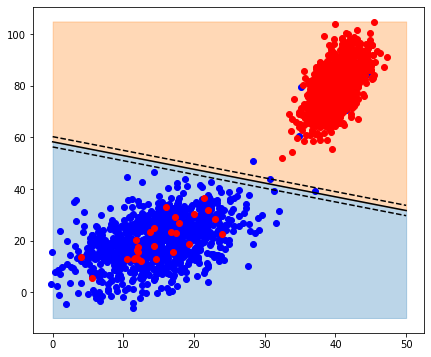

In [12]:
w = clf.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(0, 50)
yy = a * xx - (clf.intercept_[0]) / w[1]

# plot the parallels to the separating hyperplane that pass through the
# support vectors
b = clf.support_vectors_[0]
yy_down = a * xx - (((clf.intercept_[0]) / (w[1]))+2)
b = clf.support_vectors_[-1]
yy_up = a * xx - (((clf.intercept_[0]) / (w[1]))-2)

# plot the line, the points, and the nearest vectors to the plane
plt.figure(figsize=(7,6))
plt.plot(xx, yy, 'k-')
plt.plot(xx, yy_down, 'k--')
plt.plot(xx, yy_up, 'k--')

plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=80, facecolors='none')
plt.fill_between(xx, yy ,-10, color='tab:blue', alpha=0.3)
plt.fill_between(xx, yy, 105, color='tab:orange', alpha=0.3)
plt.scatter(X1["Input Feature"],X1["Input Feature.1"],color = 'blue')
plt.scatter(X2["Input Feature"],X2["Input Feature.1"],color = 'red')

##Problem 2, Part B: Non-linear S.V.M

 Use Dataset B (``data_prob2_partb.csv``) for this part of the question. The given CSV file has three columns: column 1 is the first input feature, column 2 is the second input feature and column 3 is the output label. Split the dataset into training data (75%) and testing data (25%) randomly.


In [93]:
df = pd.read_csv('data_prob2_partb.csv')
print(df.head())
y = df["Output"]
X = df.drop("Output",axis=1)
print(X)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25)

   Input Feature  Input Feature.1  Output
0      -0.973170        -0.313476     0.0
1      -0.166915        -0.759030     1.0
2      -1.002325        -0.058528     0.0
3      -0.384879         0.868446     0.0
4       0.586091         0.487222     1.0
      Input Feature  Input Feature.1
0         -0.973170        -0.313476
1         -0.166915        -0.759030
2         -1.002325        -0.058528
3         -0.384879         0.868446
4          0.586091         0.487222
...             ...              ...
2095      -0.542774        -0.826382
2096      -0.408628        -0.936934
2097      -0.935522        -0.490955
2098       0.569535        -0.571724
2099      -0.640094         0.536222

[2100 rows x 2 columns]


Visualize the training data with a scatter plot (input feature 1 on the X axis, input feature 2 on the Y axis and color the points according to their labels).


Text(0, 0.5, 'Feature 2')

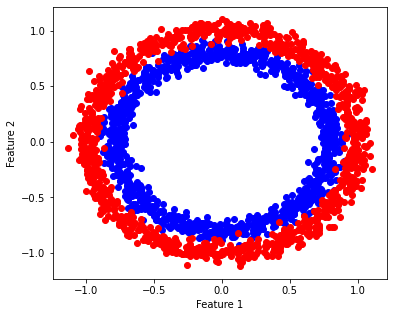

In [94]:
import matplotlib.pyplot as plt
X1 = df[df["Output"] > 0]
X2 = df[df["Output"] == 0]
plt.figure(figsize=(6,5))
plt.scatter(X1["Input Feature"],X1["Input Feature.1"],color = 'blue')
plt.scatter(X2["Input Feature"],X2["Input Feature.1"],color = 'red')
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")



Write the code for
choosing best hyperparameters for each of the kernel type.
In text cell after that report the following numbers:
Report the best kernel parameters, regularisation parametes, accuracy for ***linear***, ***RBF*** and ***poly*** kernels(Linear kernels has no kernel parameter).

Note: The scikit library can be used in this case.

In [95]:
from sklearn import metrics

clf1 = svm.SVC(kernel='linear', C=1, gamma = 2)
clf1.fit(X_train, y_train)
print(clf1.n_support_)
print("Accuracy = ",100*clf1.score(X_test,y_test,sample_weight=None))

clf2 = svm.SVC(kernel='poly', degree = 8, C=2.8)
clf2.fit(X_train, y_train)
print(clf2.n_support_)
print("Accuracy = ",100*clf2.score(X_test,y_test,sample_weight=None))

clf3 = svm.SVC(kernel='rbf', C=25)
clf3.fit(X_train, y_train)
print(clf3.n_support_)
print("Accuracy = ",100*clf3.score(X_test,y_test,sample_weight=None))

[782 782]
Accuracy =  50.095238095238095
[54 56]
Accuracy =  96.76190476190476
[66 66]
Accuracy =  97.14285714285714


Report your observation in the given table:





Kernels | Linear | RBF | Poly
--- | --- | --- |---
Kernel Parameters |None  | |8 
Regularization Parameters |1  |25 | 2.8
Accuracy | 48.19 | 97.90 |98.09





Plot the scatter plot for the test data.On top of this scatter plot, plot the decision regions for each of the kernels with their best fit

-1.1559875826564288 1.1683986528052053
[-1.15598758 -1.13598758 -1.11598758 ...  1.12401242  1.14401242
  1.16401242]
[0. 0. 0. ... 0. 0. 0.]


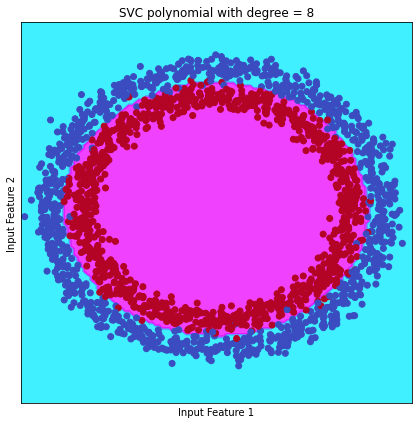

[0. 0. 0. ... 0. 0. 0.]


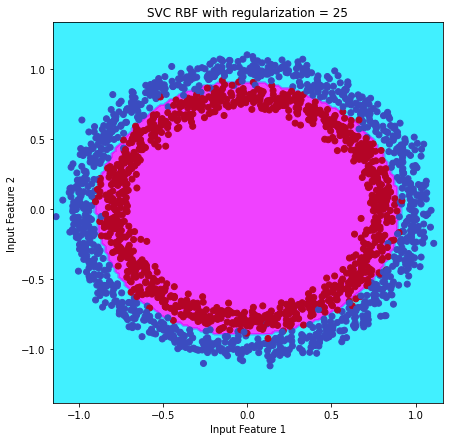

In [96]:
# create a mesh to plot in
x_min, x_max = X1["Input Feature"].min() - 0.25 , X1["Input Feature.1"].max() + 0.25
y_min, y_max = X2["Input Feature"].min() - 0.25, X2["Input Feature.1"].max() + 0.25
print(x_min,x_max)
h = .02 
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))# title for the plots
titles = ['SVC polynomial with degree = 8', 'SVC RBF with regularization = 25']
fig1=plt.figure(figsize=(7,7))
plt.title(titles[0])
print(xx.ravel())
Z = clf2.predict(np.c_[xx.ravel(), yy.ravel()])
print(Z)
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.cool, alpha=0.8)

plt.scatter(X["Input Feature"], X["Input Feature.1"], c=y, cmap=plt.cm.coolwarm)
plt.xlabel("Input Feature 1")
plt.ylabel("Input Feature 2")
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())
plt.show()

fig2 = plt.figure(figsize = (7,7))
plt.title(titles[1])
Z = clf3.predict(np.c_[xx.ravel(), yy.ravel()])
print(Z)
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.cool, alpha=0.8)

plt.scatter(X["Input Feature"], X["Input Feature.1"], c=y, cmap=plt.cm.coolwarm)
plt.xlabel("Input Feature 1")
plt.ylabel("Input Feature 2")
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

plt.show()


##Problem 2, Part C: Multiclass Classification

Use Dataset C (``data_prob3_partc.csv``) for this part of the question. The given CSV file has three columns: column 1 is the first input feature, column 2 is the second input feature and column 3 is the output label. Split the dataset into training data (75%) and testing data (25%) randomly.


In [113]:
df = pd.read_csv('data_prob2_partc.csv')
print(df.head())
y = df["Output"]
X = df.drop("Output",axis=1)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25)

   Input Feature  Input Feature.1  Output
0      -1.396342         0.084977     0.0
1       1.878268        -0.190694     1.0
2      -1.910399         1.315481     1.0
3       1.517623         0.213485     0.0
4      -3.422065        -1.020059     2.0


Visualize the training data with a scatter plot (input feature 1 on the X axis, input feature 2 on the Y axis and color the points according to their labels).

Text(0, 0.5, 'Feature 2')

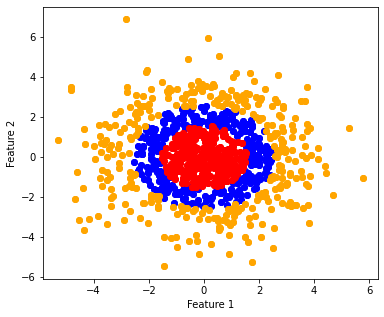

In [114]:
import matplotlib.pyplot as plt
X1 = df[df["Output"] == 1]
X2 = df[df["Output"] == 0]
X3 = df[df["Output"] == 2]
plt.figure(figsize=(6,5))
plt.scatter(X1["Input Feature"],X1["Input Feature.1"],color = 'blue')
plt.scatter(X2["Input Feature"],X2["Input Feature.1"],color = 'red')
plt.scatter(X3["Input Feature"],X3["Input Feature.1"],color = 'orange')
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

Build the Support Vector Machine  model using the 
training data. The scikit
library can be used to build the model.

In [115]:
clf = svm.SVC(kernel='rbf', C=10)
clf.fit(X_train, y_train)
print(clf.n_support_)


[ 50 102  56]


Print the final accuracy on the test data.

In [116]:
print("Accuracy = ",100*clf.score(X_test,y_test,sample_weight=None))

Accuracy =  98.8


Plot the scatter plot for the test data. On top of this scatter plot, plot the decision boundary.

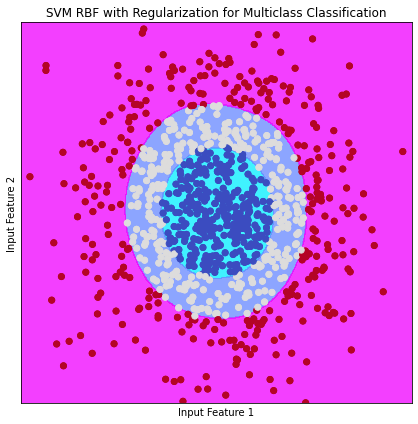

In [117]:
# create a mesh to plot in
x_min, x_max = X1["Input Feature"].min() - 3 , X1["Input Feature.1"].max() + 3
y_min, y_max = X2["Input Feature"].min() - 3, X2["Input Feature.1"].max() + 3

h = .02 
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))# title for the plots
titles = ['SVM RBF with Regularization for Multiclass Classification']
fig1=plt.figure(figsize=(7,7))
plt.title(titles[0])
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.cool, alpha=0.8)

plt.scatter(X["Input Feature"], X["Input Feature.1"], c=y, cmap=plt.cm.coolwarm)
plt.xlabel("Input Feature 1")
plt.ylabel("Input Feature 2")
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())
plt.show()

# Problem 3 : Principal Component Analysis

#### In this exercise you will perform face recognition using eigenfaces. Face recognition can be formulated as a classification task, where the inputs are images and the outputs are people's names.

Load grayscale images from the LFW - Labeled faces in the Wild dataset using scikit-learn. To reduce the number of classes, retain pictures of only those people that have atleast 100 different pictures. (already done for you here) </br></br>
Report the number of images and the size of each image.

In [118]:
from time import time
import logging
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import fetch_lfw_people
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA
from sklearn.svm import SVC

In [119]:
lfw_people = fetch_lfw_people(min_faces_per_person=100)

n_samples, h, w = lfw_people.images.shape

X = lfw_people.data
n_features = X.shape[1]

# the label to predict is the id of the person
y = lfw_people.target
target_names = lfw_people.target_names
n_classes = target_names.shape[0]

print("Total dataset size:")
print("n_samples: %d" % n_samples)
print("n_features: %d" % n_features)
print("n_classes: %d" % n_classes)

Total dataset size:
n_samples: 1140
n_features: 2914
n_classes: 5


Split the dataset into training and test sets in the ratio - 7:3.

In [120]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42)


Use scikit-learn's PCA class to perform dimensionality reduction on the training set images. Reduce the dimensions to 100 principal components. These principal components are the eigenfaces.

In [121]:
n_components = 100

print("Extracting the top %d eigenfaces from %d faces"
      % (n_components, X_train.shape[0]))
t0 = time()
pca = PCA(n_components=n_components, svd_solver='randomized',
          whiten=True).fit(X_train)
print("done in %0.3fs" % (time() - t0))

Extracting the top 100 eigenfaces from 798 faces
done in 0.074s


Reshape the principal eigenvectors into images and visualize the eigenfaces. Display 10 eigenfaces. 

Projecting the input data on the eigenfaces orthonormal basis
done in 0.000s


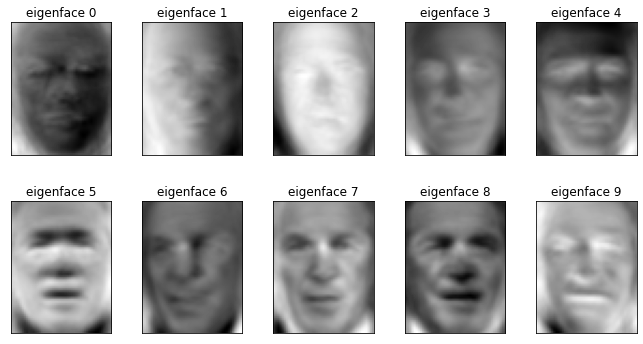

In [122]:
def plot_gallery(images, titles, h, w, n_row=2, n_col=5):
    """Helper function to plot a gallery of portraits"""
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())
        
eigenfaces = pca.components_.reshape((n_components, h, w))        
eigenface_titles = ["eigenface %d" % i for i in range(eigenfaces.shape[0])]
plot_gallery(eigenfaces, eigenface_titles, h, w)


print("Projecting the input data on the eigenfaces orthonormal basis")
t0 = time()
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)
print("done in %0.3fs" % (time() - t0))


Reconstruct any image (from training / test set) by projecting the image onto the new eigenface space. </br>
*   Display the reconstructed image along with the original image.
*   Report the reconstruction mean squared error. 

Mean squared error  =  97.33632


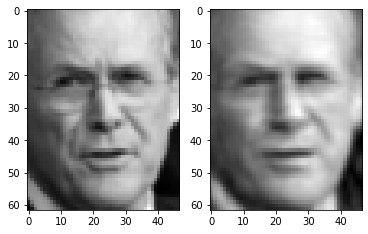

In [123]:
X_projected = pca.inverse_transform(X_train_pca)
loss = ((X_train[1] - X_projected[1]) ** 2).mean()
print('Mean squared error  = ',loss)
plt.subplot(1,2,1)
plt.imshow(X_train[1].reshape((h, w)), cmap=plt.cm.gray)

plt.subplot(1,2,2)
plt.imshow(X_projected[1].reshape((h, w)), cmap=plt.cm.gray)



Now that you have a reduced-dimensionality vector, train a single hidden layer neural network classifier with the person names as outputs and the reduced image vectors as input. You can use scikit-learn's MLPClassifier, with the number of neurons in the hidden layer set to 1024. 

In [124]:
from sklearn.neural_network import MLPClassifier

print("Fitting the classifier to the training set")
clf = MLPClassifier(hidden_layer_sizes=(1024,), batch_size=256, verbose=True, early_stopping=True).fit(X_train_pca, y_train)

Fitting the classifier to the training set
Iteration 1, loss = 1.47280289
Validation score: 0.475000
Iteration 2, loss = 1.09671383
Validation score: 0.475000
Iteration 3, loss = 0.88196091
Validation score: 0.550000
Iteration 4, loss = 0.69641976
Validation score: 0.650000
Iteration 5, loss = 0.55043625
Validation score: 0.775000
Iteration 6, loss = 0.43907032
Validation score: 0.800000
Iteration 7, loss = 0.36076320
Validation score: 0.787500
Iteration 8, loss = 0.29769788
Validation score: 0.775000
Iteration 9, loss = 0.24584114
Validation score: 0.775000
Iteration 10, loss = 0.20456038
Validation score: 0.787500
Iteration 11, loss = 0.17186291
Validation score: 0.787500
Iteration 12, loss = 0.14425748
Validation score: 0.787500
Iteration 13, loss = 0.12317206
Validation score: 0.787500
Iteration 14, loss = 0.10552433
Validation score: 0.787500
Iteration 15, loss = 0.09060081
Validation score: 0.800000
Iteration 16, loss = 0.07856300
Validation score: 0.800000
Iteration 17, loss = 0

Now test your network's predictions on the test set and print out the precision, recall and support values for each class. Also display the images (say, 10 test images) along with the true and the  predicted label.

In [125]:
y_pred = clf.predict(X_test_pca)
print(classification_report(y_test, y_pred, target_names=target_names))

                   precision    recall  f1-score   support

     Colin Powell       0.93      0.88      0.91        78
  Donald Rumsfeld       0.84      0.68      0.75        38
    George W Bush       0.88      0.96      0.92       159
Gerhard Schroeder       0.92      0.77      0.84        30
       Tony Blair       0.79      0.84      0.82        37

         accuracy                           0.88       342
        macro avg       0.87      0.83      0.85       342
     weighted avg       0.88      0.88      0.88       342



Repeat all the above steps for different values of number of principal components or eigen faces - 100, 150 and 200. Explain the change in the proportion of the total variance explained by the eigenfaces and reconstruction mean squared error with increase in the number of eigenfaces.

Extracting the top 150 eigenfaces from 798 faces
done in 0.071s
Projecting the input data on the eigenfaces orthonormal basis
done in 0.020s
Mean squared error  =  69.34481
Fitting the classifier to the training set
Iteration 1, loss = 1.69333007
Validation score: 0.437500
Iteration 2, loss = 1.10043889
Validation score: 0.537500
Iteration 3, loss = 0.82537424
Validation score: 0.575000
Iteration 4, loss = 0.62251687
Validation score: 0.662500
Iteration 5, loss = 0.45704058
Validation score: 0.675000
Iteration 6, loss = 0.34157157
Validation score: 0.737500
Iteration 7, loss = 0.26187277
Validation score: 0.762500
Iteration 8, loss = 0.20258984
Validation score: 0.775000
Iteration 9, loss = 0.15791490
Validation score: 0.775000
Iteration 10, loss = 0.12513504
Validation score: 0.762500
Iteration 11, loss = 0.10154319
Validation score: 0.750000
Iteration 12, loss = 0.08348447
Validation score: 0.750000
Iteration 13, loss = 0.06946283
Validation score: 0.750000
Iteration 14, loss = 0.058

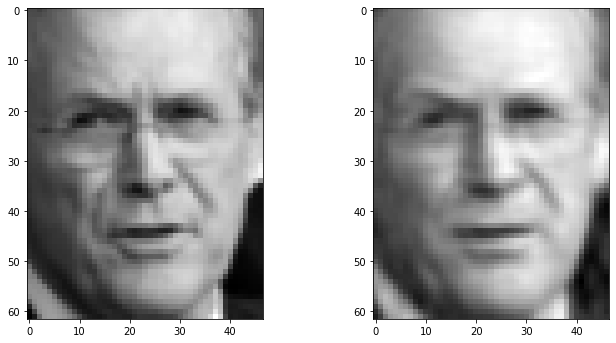

In [130]:
n_components = 150

print("Extracting the top %d eigenfaces from %d faces"
      % (n_components, X_train.shape[0]))
t0 = time()
pca = PCA(n_components=n_components, svd_solver='randomized',
          whiten=True).fit(X_train)
print("done in %0.3fs" % (time() - t0))

        
eigenfaces = pca.components_.reshape((n_components, h, w))        
eigenface_titles = ["eigenface %d" % i for i in range(eigenfaces.shape[0])]
plot_gallery(eigenfaces, eigenface_titles, h, w)


print("Projecting the input data on the eigenfaces orthonormal basis")
t0 = time()
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)
print("done in %0.3fs" % (time() - t0))



X_projected = pca.inverse_transform(X_train_pca)
loss = ((X_train[1] - X_projected[1]) ** 2).mean()
print('Mean squared error  = ',loss)
plt.subplot(1,2,1)
plt.imshow(X_train[1].reshape((h, w)), cmap=plt.cm.gray)

plt.subplot(1,2,2)
plt.imshow(X_projected[1].reshape((h, w)), cmap=plt.cm.gray)


print("Fitting the classifier to the training set")
clf = MLPClassifier(hidden_layer_sizes=(1024,), batch_size=256, verbose=True, early_stopping=True).fit(X_train_pca, y_train)

y_pred = clf.predict(X_test_pca)
print(classification_report(y_test, y_pred, target_names=target_names))




Extracting the top 200 eigenfaces from 798 faces
done in 0.077s
Projecting the input data on the eigenfaces orthonormal basis
done in 0.019s
Mean squared error  =  47.688126
Fitting the classifier to the training set
Iteration 1, loss = 1.61606041
Validation score: 0.550000
Iteration 2, loss = 1.07321251
Validation score: 0.550000
Iteration 3, loss = 0.77306468
Validation score: 0.650000
Iteration 4, loss = 0.52708540
Validation score: 0.737500
Iteration 5, loss = 0.36111546
Validation score: 0.762500
Iteration 6, loss = 0.26183946
Validation score: 0.787500
Iteration 7, loss = 0.19300362
Validation score: 0.800000
Iteration 8, loss = 0.14342628
Validation score: 0.787500
Iteration 9, loss = 0.10773825
Validation score: 0.787500
Iteration 10, loss = 0.08263534
Validation score: 0.787500
Iteration 11, loss = 0.06514972
Validation score: 0.800000
Iteration 12, loss = 0.05258584
Validation score: 0.800000
Iteration 13, loss = 0.04358542
Validation score: 0.800000
Iteration 14, loss = 0.03

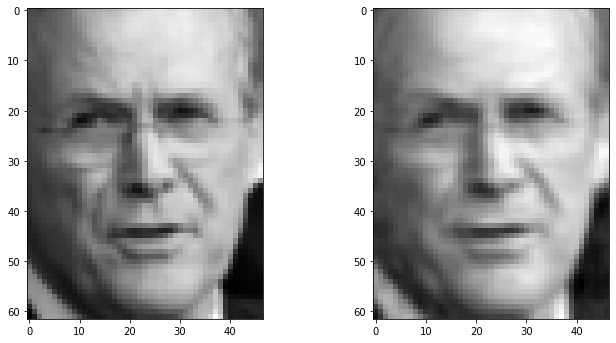

In [128]:
n_components = 200

print("Extracting the top %d eigenfaces from %d faces"
      % (n_components, X_train.shape[0]))
t0 = time()
pca = PCA(n_components=n_components, svd_solver='randomized',
          whiten=True).fit(X_train)
print("done in %0.3fs" % (time() - t0))

        
eigenfaces = pca.components_.reshape((n_components, h, w))        
eigenface_titles = ["eigenface %d" % i for i in range(eigenfaces.shape[0])]
plot_gallery(eigenfaces, eigenface_titles, h, w)


print("Projecting the input data on the eigenfaces orthonormal basis")
t0 = time()
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)
print("done in %0.3fs" % (time() - t0))



X_projected = pca.inverse_transform(X_train_pca)
loss = ((X_train[1] - X_projected[1]) ** 2).mean()
print('Mean squared error  = ',loss)
plt.subplot(1,2,1)
plt.imshow(X_train[1].reshape((h, w)), cmap=plt.cm.gray)

plt.subplot(1,2,2)
plt.imshow(X_projected[1].reshape((h, w)), cmap=plt.cm.gray)


print("Fitting the classifier to the training set")
clf = MLPClassifier(hidden_layer_sizes=(1024,), batch_size=256, verbose=True, early_stopping=True).fit(X_train_pca, y_train)

y_pred = clf.predict(X_test_pca)
print(classification_report(y_test, y_pred, target_names=target_names))



Bonus : Try using eigenfaces to recognize images of animal faces.
